In [1]:
# Import packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from cnn_utils import *
import time

In [2]:
new_data = load_predict_data()

In [3]:
X, Y = create_placeholders(28, 28, 1, 10)
W1, W2, W3 = initialize_parameters()
# W1 = tf.Variable(tf.random_normal([4,4,1,8]))
# W2 = tf.Variable(tf.random_normal([4,4,8,16]))
Z = forward_propagation(X, W1, W2, W3)
A = tf.argmax(Z, 1)
sess2 = tf.Session()
saver = tf.train.Saver()
saver.restore(sess2, CKPT_PATH)

INFO:tensorflow:Restoring parameters from ./cnn/cnn.ckpt


In [4]:
score, pred = sess2.run([Z, A], feed_dict={X: new_data})

In [25]:
res = []
for i in range(len(score)):
    temp = sorted(score[i], reverse=True)
    val = (temp[0] - temp[1]) / temp[0]
    res.append((i, val))

In [27]:
res.sort(key=lambda x:x[1])

In [28]:
res

[(8229, 0.001281278),
 (24817, 0.0021969567),
 (23764, 0.0037644447),
 (27789, 0.0039083161),
 (4583, 0.0046024984),
 (11746, 0.0062603899),
 (710, 0.0066785268),
 (21930, 0.0084222034),
 (21056, 0.0087651918),
 (4018, 0.0091860434),
 (16876, 0.010642865),
 (20774, 0.011479415),
 (2687, 0.012290087),
 (2126, 0.01232149),
 (26179, 0.012857594),
 (2650, 0.013198702),
 (76, 0.013375704),
 (22491, 0.013445321),
 (9595, 0.013561537),
 (11895, 0.014308906),
 (2106, 0.014764008),
 (12726, 0.016707281),
 (5826, 0.016969414),
 (9682, 0.017940884),
 (12438, 0.018835071),
 (16323, 0.019704746),
 (10396, 0.01976666),
 (23642, 0.019971248),
 (20606, 0.021486254),
 (3256, 0.022594364),
 (6752, 0.022599144),
 (17137, 0.022667378),
 (18180, 0.024054509),
 (5218, 0.024267826),
 (8489, 0.024440419),
 (10040, 0.025227424),
 (13166, 0.025751842),
 (26137, 0.026187541),
 (20216, 0.026205359),
 (18948, 0.026337473),
 (12873, 0.026449924),
 (25106, 0.027048422),
 (2175, 0.027203312),
 (27343, 0.027427778),
 

In [29]:
i = 0

In [727]:
df = pd.read_csv('res.csv')

In [33]:
X_new = load_predict_data()

In [54]:
i = 0

In [808]:
df_spec = df[df.Label == 3]
index = df_spec.ImageId
i = 2400

IndexError: single positional indexer is out-of-bounds

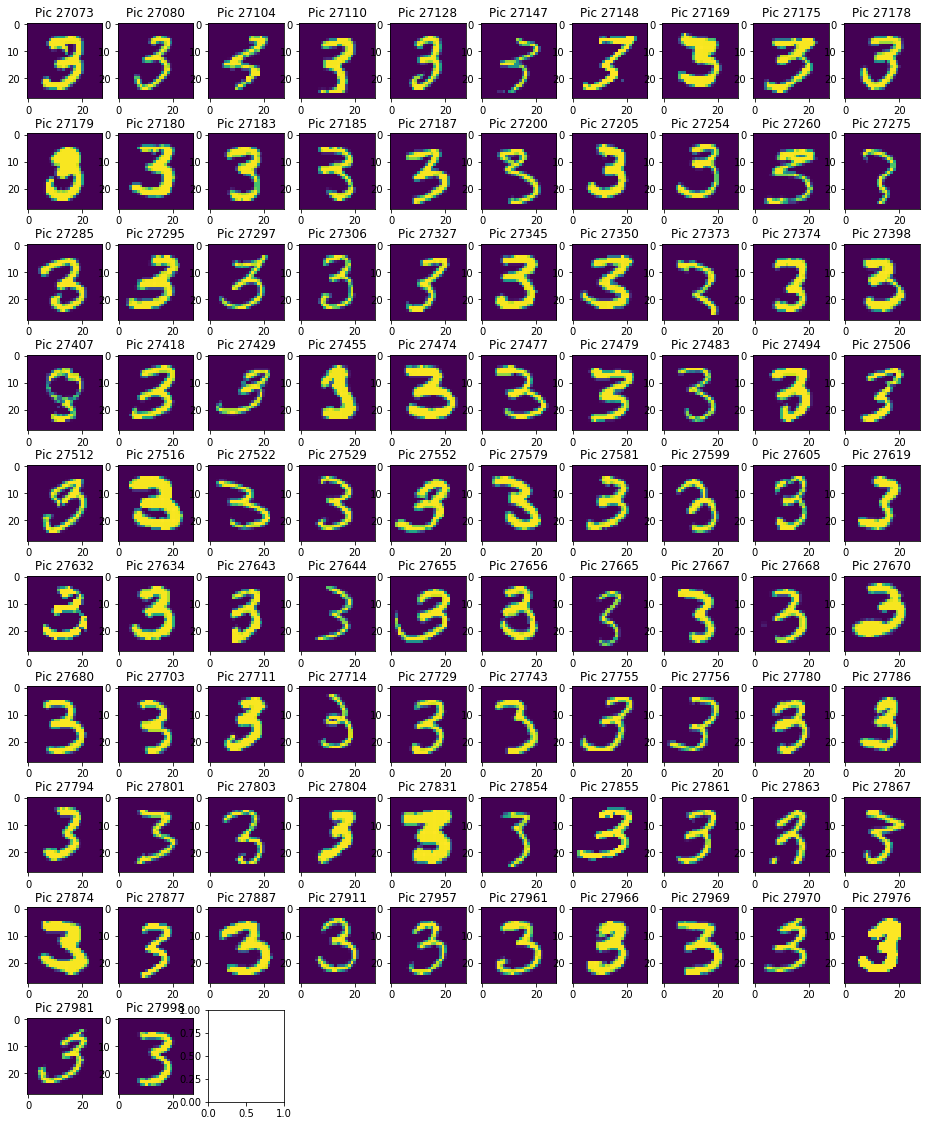

In [812]:
fig = plt.figure(figsize=(16,20))
for k in range(100):
    a = fig.add_subplot(10,10,k+1)
    plt.imshow(X_new[index.iloc[i+k]-1][:,:,0])
    a.set_title("Pic " + str(index.iloc[i+k]))    
i += 100

In [42]:
df.to_csv('res_new.csv')

In [13]:
score[0]

array([  1.1628449 ,  -4.39434147,  41.40301514,   9.62338543,
       -10.97740364, -34.0789299 , -17.47249794,   3.48016   ,
       -13.87693214, -18.87539291], dtype=float32)

([array([  1.00000000e+00,   4.40000000e+01,   1.10100000e+03,
           9.96600000e+03,   1.21010000e+04,   2.22800000e+03,
           6.09000000e+02,   1.12500000e+03,   7.30000000e+02,
           9.50000000e+01]),
  array([  0.00000000e+00,   2.10000000e+01,   3.73000000e+02,
           4.91400000e+03,   1.92310000e+04,   4.46000000e+02,
           1.80100000e+03,   1.20800000e+03,   6.00000000e+00,
           0.00000000e+00]),
  array([     0.,      0.,     82.,   2919.,  20116.,   3151.,   1616.,
            116.,      0.,      0.]),
  array([     0.,      0.,     99.,   2485.,  20399.,   2979.,   1848.,
            190.,      0.,      0.]),
  array([  1.26000000e+02,   1.50700000e+03,   2.70100000e+03,
           4.29100000e+03,   1.46960000e+04,   3.21500000e+03,
           1.32100000e+03,   1.42000000e+02,   1.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.00000000e+00,   3.48000000e+02,
           8.32200000e+03,   1.09200000e+04,   7.58800000e+03,


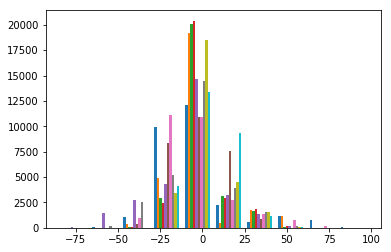

In [10]:
plt.hist(score)

In [ ]:
df = pd.DataFrame(pred)

In [ ]:
df.index += 1
df.index.name = 'ImageId'
df.columns = ['Label']
df.to_csv("res2.csv")